### Installing dependencies

In [ ]:
# Data science / ML imports - core libraries and models/metrics we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn helpers: splitting, models, scalers and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


### Loading dataset

In [ ]:
# Load dataset - change path if your CSV is located elsewhere
data = pd.read_csv("D:\youtube\Energy_Efficiency\ENB2012_data.csv")
# Quick glance at the data (first 5 rows)
data.head()

<>:1: SyntaxWarning: "\y" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\y"? A raw string is also an option.
<>:1: SyntaxWarning: "\y" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\y"? A raw string is also an option.
C:\Users\kirat singh\AppData\Local\Temp\ipykernel_7340\111341704.py:1: SyntaxWarning: "\y" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\y"? A raw string is also an option.
  data=pd.read_csv("D:\youtube\Energy_Efficiency\ENB2012_data.csv")


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Checking data duplications

In [ ]:
# Check for duplicate rows - if >0 consider dropping duplicates
data.duplicated().sum()

np.int64(0)

### Checking missing values

In [ ]:
# Check for missing values column-wise
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

### Checking for outliers

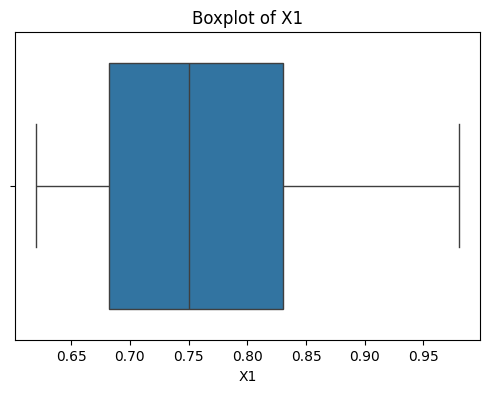

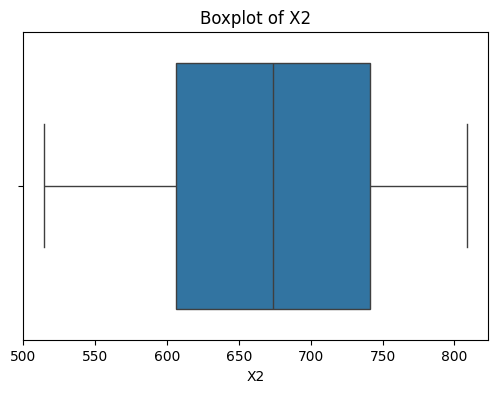

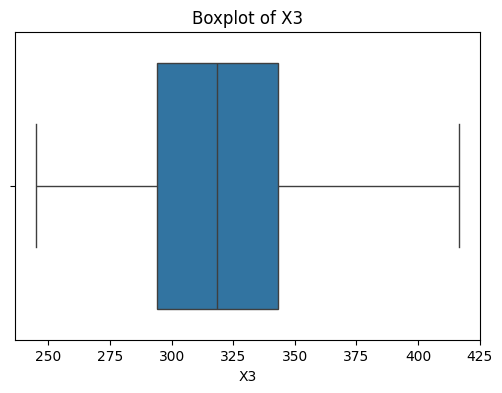

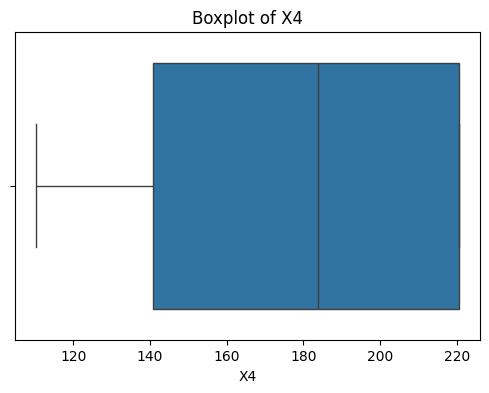

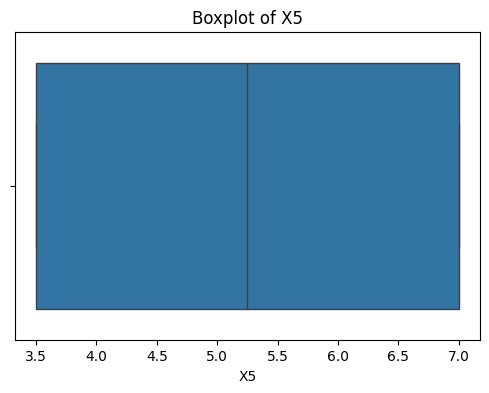

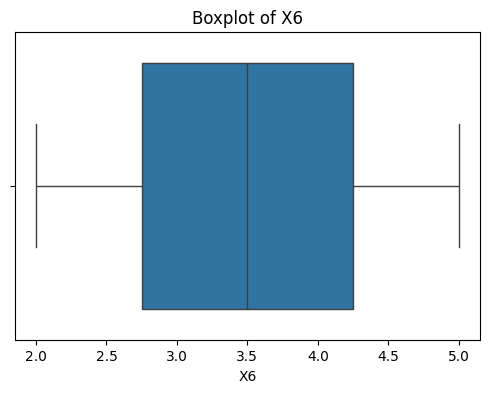

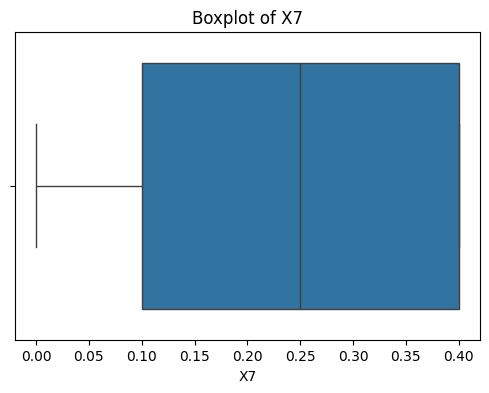

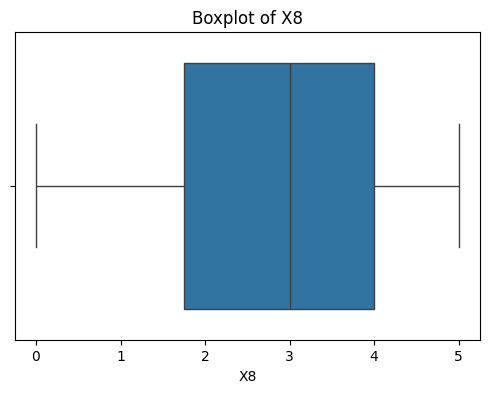

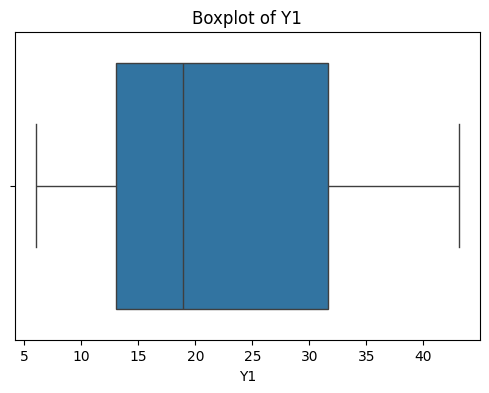

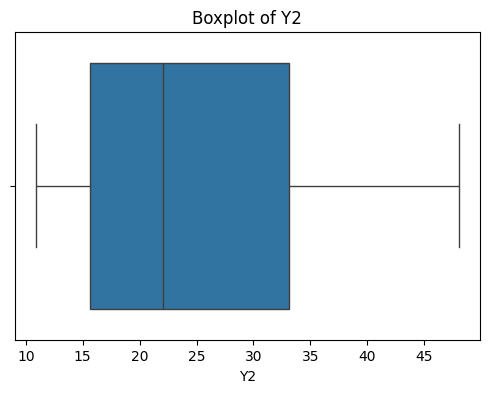

In [ ]:
# Boxplots for each column to inspect outliers and distributions
for i in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=i, data=data)
    plt.title(f'Boxplot of {i}')
    plt.tight_layout()
    plt.show()

### Standardizing the features

In [ ]:
# Standardize features to zero mean and unit variance.
# Note: for a strict ML pipeline you should fit the scaler on the training set only
# and then apply the same transform to the test set. Here we scale the whole
# dataset in-place for simplicity. Consider moving this after train_test_split
ss = StandardScaler()
for i in data.columns:
    data[i] = ss.fit_transform(data[[i]])

# Show scaled data summary
data.describe().round(3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,-0.670116,-0.342666
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,-0.670116,-0.342666
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,-0.670116,-0.342666
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,-0.670116,-0.342666
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,-0.145503,0.388366
...,...,...,...,...,...,...,...,...,...,...
763,-1.174613,1.275625,0.561951,0.972512,-1.0,1.341641,1.244049,1.411336,-0.439049,-0.335303
764,-1.363812,1.553943,1.123903,0.972512,-1.0,-1.341641,1.244049,1.411336,-0.571937,-0.810736
765,-1.363812,1.553943,1.123903,0.972512,-1.0,-0.447214,1.244049,1.411336,-0.581854,-0.786544
766,-1.363812,1.553943,1.123903,0.972512,-1.0,0.447214,1.244049,1.411336,-0.577887,-0.839136


### Checking for Skewness

In [ ]:
# Print skewness for each column to inspect departure from normality
for i in data.columns:
    skewness = data[i].skew()
    print(f'Skewness of {i} : {skewness:.4f}')

Skewness of X1 : 0.4955125057584307
Skewness of X2 : -0.12513088471591632
Skewness of X3 : 0.5334174896788308
Skewness of X4 : -0.16276399781124515
Skewness of X5 : 0.0
Skewness of X6 : 0.0
Skewness of X7 : -0.06025422865372615
Skewness of X8 : -0.08868917543812248
Skewness of Y1 : 0.360448886462131
Skewness of Y2 : 0.39599246696276763


### spliting the dataset into train and test sets

In [ ]:
# Split features and targets. The dataset's last two columns are targets Y1 and Y2
x = data.iloc[:, :-2]
y = data.loc[:, ["Y1", "Y2"]]
# Train/test split - keep a reproducible random_state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit a simple Linear Regression as a baseline model
lr = LinearRegression()
lr.fit(x_train, y_train)
# lr is trained to predict both Y1 and Y2 simultaneously (multi-output regression)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Evaluate Linear Regression on test set with readable labels
y_pred_lr = lr.predict(x_test)
print('LinearRegression MSE:', mean_squared_error(y_test, y_pred_lr))
print('LinearRegression MAE:', mean_absolute_error(y_test, y_pred_lr))
print('LinearRegression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('LinearRegression R2 score:', r2_score(y_test, y_pred_lr))

0.09973928620624992
0.22365299901986557
0.3158152722815189
0.9027048110077098


In [ ]:
# Print explained variance (score) for train and test sets in percentage
print('LinearRegression test score (%):', lr.score(x_test, y_test) * 100)
print('LinearRegression train score (%):', lr.score(x_train, y_train) * 100)

90.27048110077098
90.14929585114227


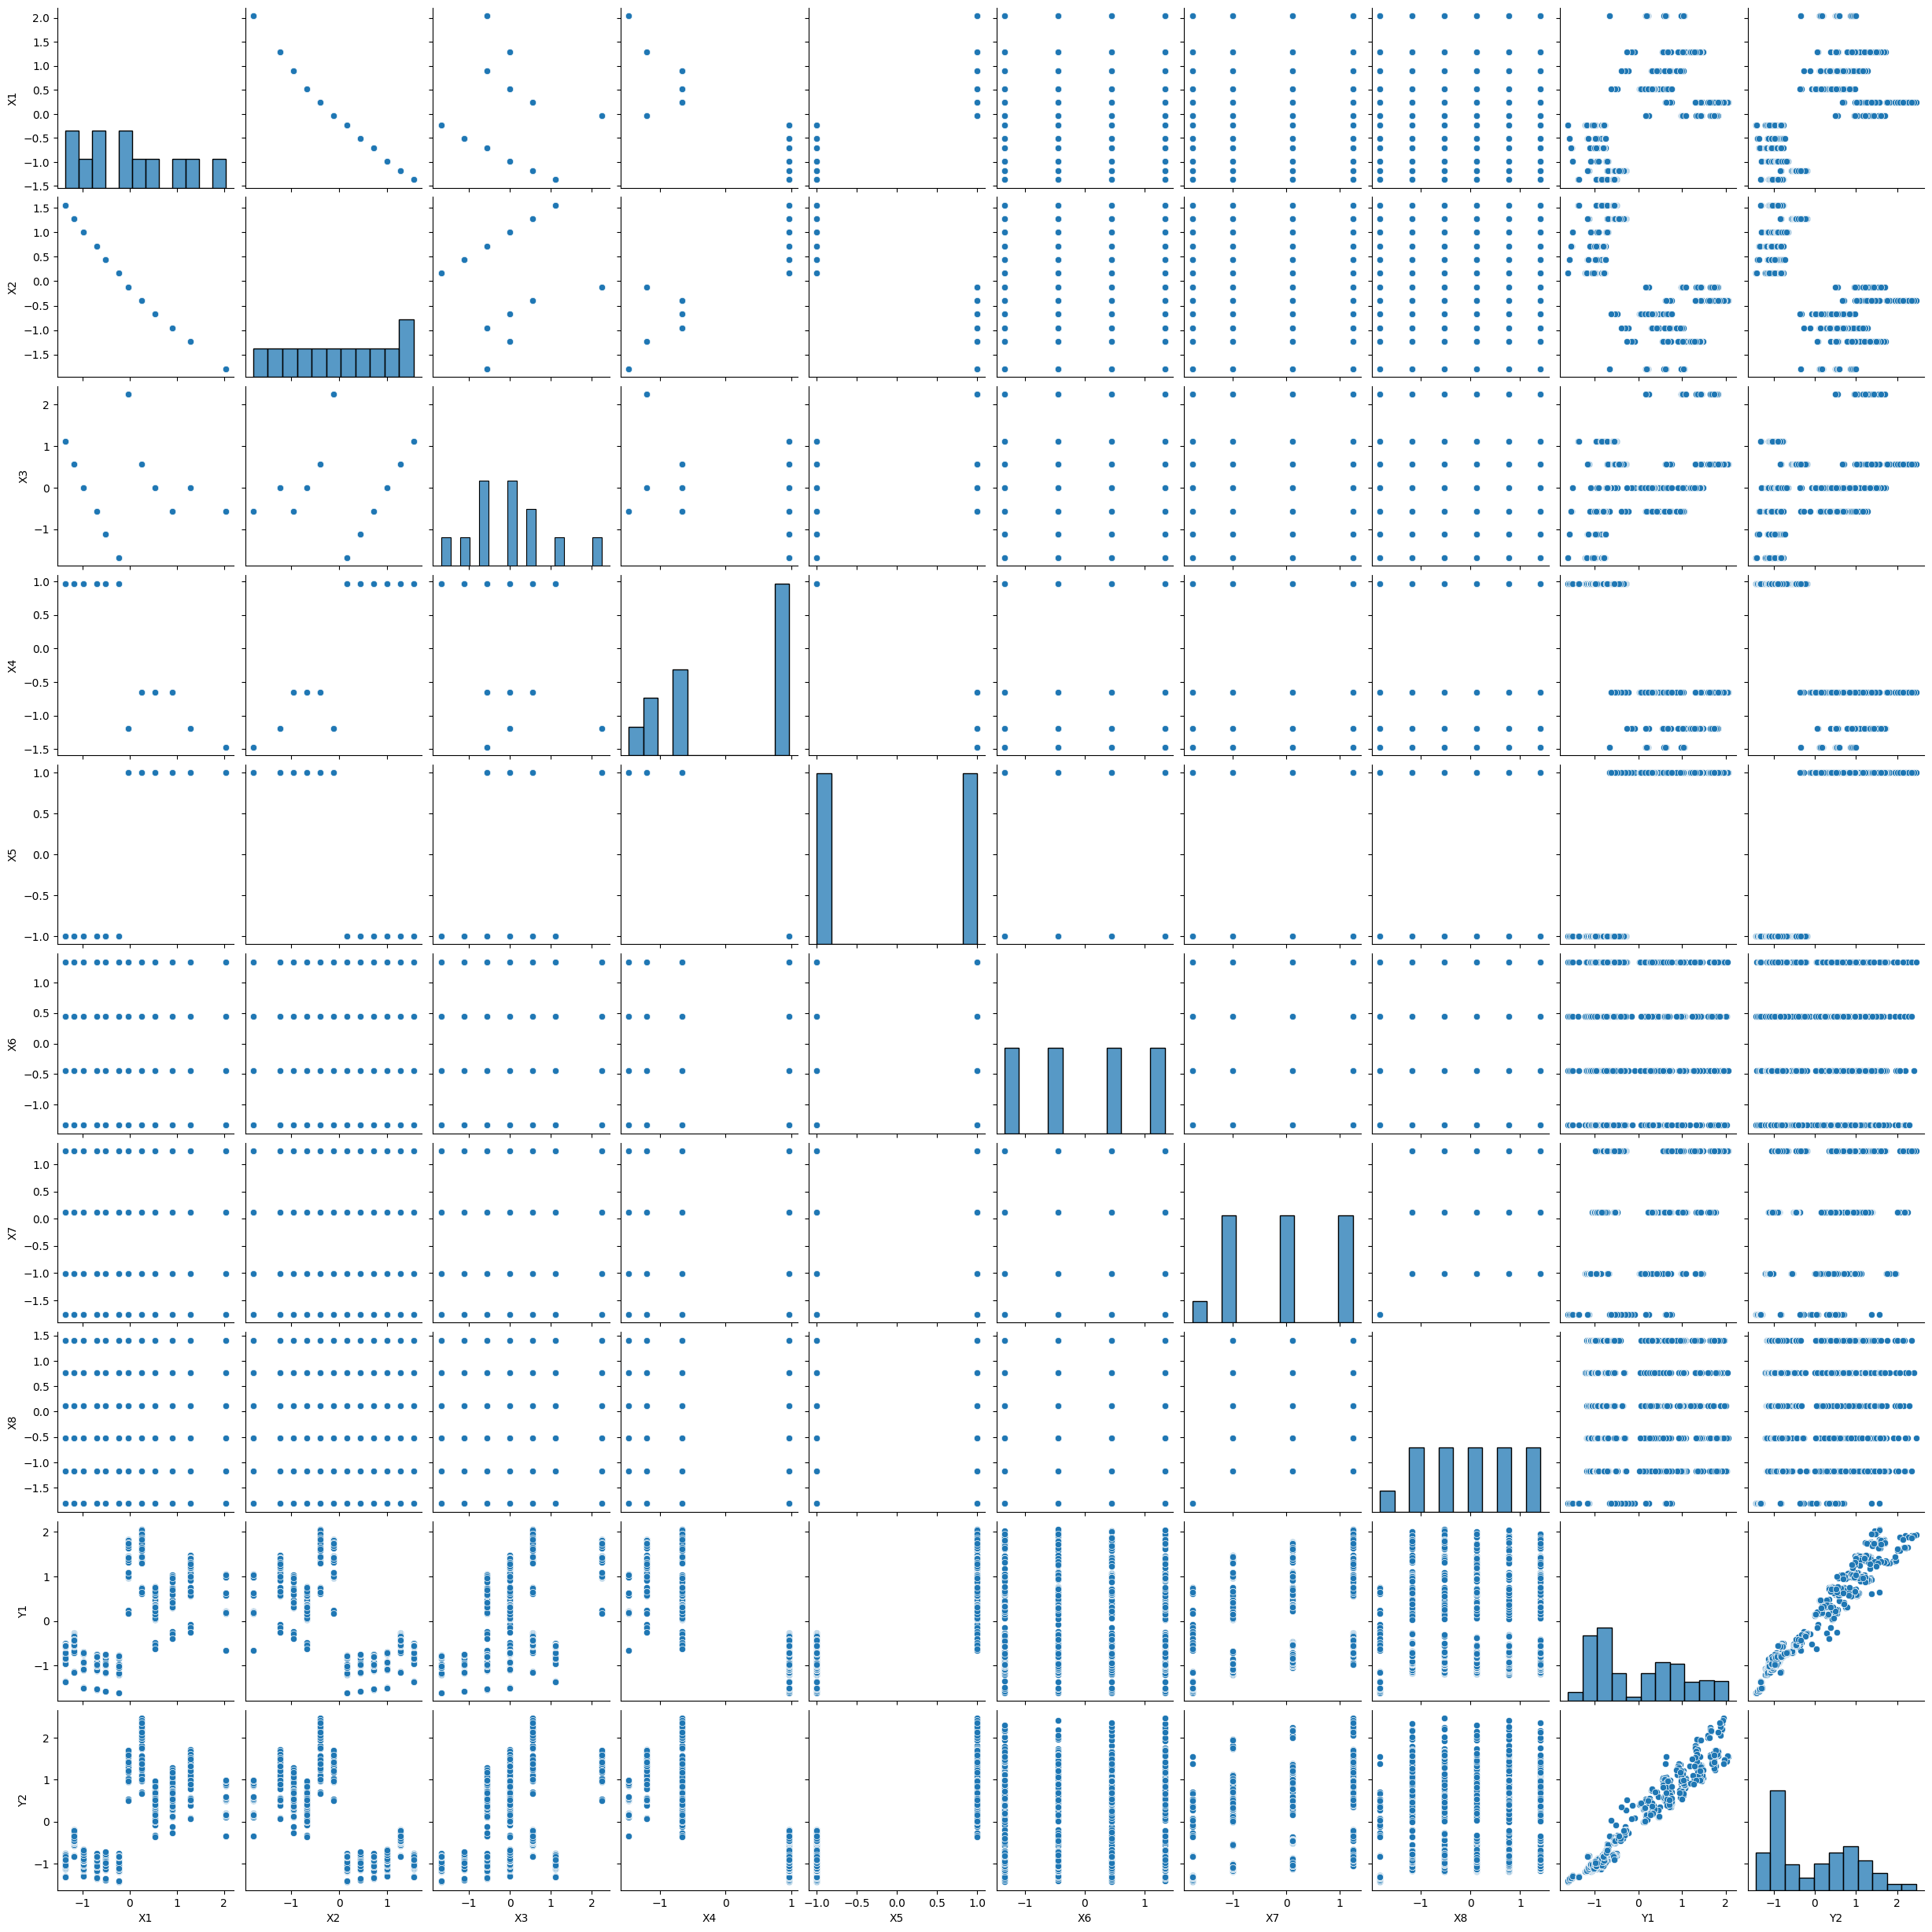

In [ ]:
# Pairplot - can be slow for large datasets. Use a subset if needed
sns.pairplot(data)
plt.show()

In [ ]:
# Decision Tree regressor - simple non-linear baseline
dtr = DecisionTreeRegressor(
    min_samples_leaf=10,
    min_samples_split=10,
    max_depth=5,
    random_state=42
)
dtr.fit(x_train, y_train)
# dtr is now fitted; we'll evaluate it in the next cell

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
# Evaluate Decision Tree predictions on the test set
y_pred_dtr = dtr.predict(x_test)
print('DecisionTree MSE:', mean_squared_error(y_test, y_pred_dtr))
print('DecisionTree MAE:', mean_absolute_error(y_test, y_pred_dtr))
print('DecisionTree RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
print('DecisionTree R2 score:', r2_score(y_test, y_pred_dtr))

0.09973928620624992
0.22365299901986557
0.3158152722815189
0.9027048110077098


In [ ]:
# Random Forest regressor - ensemble of decision trees
ran = RandomForestRegressor(
    n_estimators=110,
    min_samples_leaf=10,
    min_samples_split=10,
    max_depth=7,
    random_state=42
)
ran.fit(x_train, y_train)
y_pred_rf = ran.predict(x_test)
print('RandomForest MSE:', mean_squared_error(y_test, y_pred_rf))
print('RandomForest MAE:', mean_absolute_error(y_test, y_pred_rf))
print('RandomForest RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('RandomForest R2 score:', r2_score(y_test, y_pred_rf))

# Optional: show feature importances (averaged across trees)
try:
    importances = ran.feature_importances_
    print('Feature importances (first 10):', importances[:10])
except Exception as e:
    print('Could not get feature importances:', e)

0.03335788170866669
0.11740887325559742
0.18264140195658454
0.967459702293635
